In [1]:
import os
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import sklearn
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

C:\Users\Brandon\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\Brandon\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.bagging module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\Brandon\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.base module is  deprecated in version 0.22 and will be remo

In [2]:
#Set Psudeorandom Seed
seed = 42

In [3]:
#Uploading the first dataset
file = 'C:/Users/Brandon/Documents/thesis/data/2y_offset.xlsx'
df = pd.read_excel (file,index_col=0,na_values=['..'])
print('file uploaded')

file uploaded


In [4]:
#Create testing and training sets
array = df.values

#Create X array
X= array[:,4:37]

# Standardizing the features
X = StandardScaler().fit_transform(X)

#Create Y array
Y= array[:,3]
Y=Y.astype('int')

#Training/Test Split
X_train, X_validation, Y_train, Y_validation = train_test_split(X,Y,test_size=0.2,random_state=1 )
print('Train/Test Split Complete')

Train/Test Split Complete


In [5]:
#Impliment SMOTE
sm = SMOTE(random_state = 2) 
X_train_smote, Y_train_smote = sm.fit_sample(X_train, Y_train)

print('oversampling complete')

oversampling complete


C:\Users\Brandon\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [81]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear',multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RTREE', RandomForestClassifier(max_depth=3, random_state=seed)))
models.append(('XTREE', xgb.XGBRFClassifier(random_state=seed)))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

results = []
names = []
for name, model in models:
    kfold=StratifiedKFold(n_splits=10, random_state=seed, shuffle=True)
    cv_results=cross_val_score(model,X_train_smote, Y_train_smote, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.895195 (0.009073)
LDA: 0.875201 (0.009225)
KNN: 0.926195 (0.009013)
CART: 0.920290 (0.007959)
RTREE: 0.922034 (0.005929)
XTREE: 0.929683 (0.006927)
NB: 0.845809 (0.012246)
SVM: 0.914520 (0.009232)


In [6]:
# Make predictions on validation dataset
model = LogisticRegression(solver='liblinear',multi_class='ovr')
model.fit(X_train_smote, Y_train_smote)
predictions = model.predict(X_validation)

# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.8776019983347211
[[806  86]
 [ 61 248]]
              precision    recall  f1-score   support

           0       0.93      0.90      0.92       892
           1       0.74      0.80      0.77       309

    accuracy                           0.88      1201
   macro avg       0.84      0.85      0.84      1201
weighted avg       0.88      0.88      0.88      1201



In [7]:
# Make predictions on validation dataset
model = LinearDiscriminantAnalysis()
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.8784346378018318
[[831  61]
 [ 85 224]]
              precision    recall  f1-score   support

           0       0.91      0.93      0.92       892
           1       0.79      0.72      0.75       309

    accuracy                           0.88      1201
   macro avg       0.85      0.83      0.84      1201
weighted avg       0.88      0.88      0.88      1201



In [8]:
# Make predictions on validation dataset
model = KNeighborsClassifier()
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.8967527060782681
[[840  52]
 [ 72 237]]
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       892
           1       0.82      0.77      0.79       309

    accuracy                           0.90      1201
   macro avg       0.87      0.85      0.86      1201
weighted avg       0.90      0.90      0.90      1201



In [9]:
# Make predictions on validation dataset
model = DecisionTreeClassifier()
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9017485428809325
[[835  57]
 [ 61 248]]
              precision    recall  f1-score   support

           0       0.93      0.94      0.93       892
           1       0.81      0.80      0.81       309

    accuracy                           0.90      1201
   macro avg       0.87      0.87      0.87      1201
weighted avg       0.90      0.90      0.90      1201



In [10]:
# Make predictions on validation dataset
model = RandomForestClassifier(max_depth=3, random_state=seed)
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.8942547876769359
[[849  43]
 [ 84 225]]
              precision    recall  f1-score   support

           0       0.91      0.95      0.93       892
           1       0.84      0.73      0.78       309

    accuracy                           0.89      1201
   macro avg       0.87      0.84      0.86      1201
weighted avg       0.89      0.89      0.89      1201



In [11]:
# Make predictions on validation dataset
model = xgb.XGBRFClassifier(random_state=seed)
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.8959200666111574
[[835  57]
 [ 68 241]]
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       892
           1       0.81      0.78      0.79       309

    accuracy                           0.90      1201
   macro avg       0.87      0.86      0.86      1201
weighted avg       0.89      0.90      0.90      1201



In [12]:
# Make predictions on validation dataset
model = GaussianNB()
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.8609492089925063
[[800  92]
 [ 75 234]]
              precision    recall  f1-score   support

           0       0.91      0.90      0.91       892
           1       0.72      0.76      0.74       309

    accuracy                           0.86      1201
   macro avg       0.82      0.83      0.82      1201
weighted avg       0.86      0.86      0.86      1201



In [13]:
# Make predictions on validation dataset
model = SVC(gamma='auto')
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.8867610324729392
[[838  54]
 [ 82 227]]
              precision    recall  f1-score   support

           0       0.91      0.94      0.92       892
           1       0.81      0.73      0.77       309

    accuracy                           0.89      1201
   macro avg       0.86      0.84      0.85      1201
weighted avg       0.88      0.89      0.88      1201



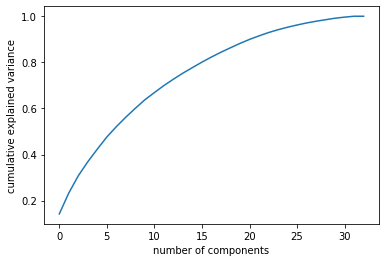

In [14]:
pca = PCA().fit(X_train_smote)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [15]:
pca = PCA(.8)
principalComponents = pca.fit_transform(X_train_smote)

In [16]:
pca.n_components_

16

In [17]:
pca.explained_variance_ratio_

array([0.14221931, 0.09075906, 0.07501456, 0.06070311, 0.05480371,
       0.05251506, 0.0449458 , 0.04136463, 0.03844093, 0.03687053,
       0.03118877, 0.03052316, 0.02749541, 0.0263527 , 0.02407817,
       0.02370383])

In [18]:
np.cumsum(pca.explained_variance_ratio_)

array([0.14221931, 0.23297838, 0.30799294, 0.36869605, 0.42349976,
       0.47601482, 0.52096062, 0.56232525, 0.60076618, 0.63763671,
       0.66882548, 0.69934865, 0.72684405, 0.75319676, 0.77727492,
       0.80097875])

In [19]:
X_train_pca = pca.transform(X_train_smote)
X_validation_pca = pca.transform(X_validation)

In [67]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear',multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RTREE', RandomForestClassifier(max_depth=3, random_state=seed)))
models.append(('XTREE', xgb.XGBRFClassifier(random_state=seed)))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

results = []
names = []
for name, model in models:
    kfold=StratifiedKFold(n_splits=10, random_state=seed, shuffle=True)
    cv_results=cross_val_score(model,X_train_pca, Y_train_smote, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.886607 (0.005491)
LDA: 0.853191 (0.010659)
KNN: 0.921094 (0.006418)
CART: 0.898417 (0.008111)
RTREE: 0.830780 (0.013363)
XTREE: 0.815082 (0.008375)
NB: 0.711080 (0.021394)
SVM: 0.915325 (0.009851)


In [20]:
# Make predictions on validation dataset
model = LogisticRegression(solver='liblinear',multi_class='ovr')
model.fit(X_train_pca, Y_train_smote)
predictions = model.predict(X_validation_pca)

# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.8742714404662781
[[802  90]
 [ 61 248]]
              precision    recall  f1-score   support

           0       0.93      0.90      0.91       892
           1       0.73      0.80      0.77       309

    accuracy                           0.87      1201
   macro avg       0.83      0.85      0.84      1201
weighted avg       0.88      0.87      0.88      1201



In [21]:
# Make predictions on validation dataset
model = LinearDiscriminantAnalysis()
model.fit(X_train_pca, Y_train_smote)
predictions = model.predict(X_validation_pca)

# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.8601165695253955
[[777 115]
 [ 53 256]]
              precision    recall  f1-score   support

           0       0.94      0.87      0.90       892
           1       0.69      0.83      0.75       309

    accuracy                           0.86      1201
   macro avg       0.81      0.85      0.83      1201
weighted avg       0.87      0.86      0.86      1201



In [22]:
# Make predictions on validation dataset
model = KNeighborsClassifier()
model.fit(X_train_pca, Y_train_smote)
predictions = model.predict(X_validation_pca)

# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.8792672772689425
[[794  98]
 [ 47 262]]
              precision    recall  f1-score   support

           0       0.94      0.89      0.92       892
           1       0.73      0.85      0.78       309

    accuracy                           0.88      1201
   macro avg       0.84      0.87      0.85      1201
weighted avg       0.89      0.88      0.88      1201



In [23]:
# Make predictions on validation dataset
model = DecisionTreeClassifier()
model.fit(X_train_pca, Y_train_smote)
predictions = model.predict(X_validation_pca)

# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.8576186511240633
[[795  97]
 [ 74 235]]
              precision    recall  f1-score   support

           0       0.91      0.89      0.90       892
           1       0.71      0.76      0.73       309

    accuracy                           0.86      1201
   macro avg       0.81      0.83      0.82      1201
weighted avg       0.86      0.86      0.86      1201



In [24]:
# Make predictions on validation dataset
model = RandomForestClassifier(max_depth=3, random_state=seed)
model.fit(X_train_pca, Y_train_smote)
predictions = model.predict(X_validation_pca)

# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.7826810990840966
[[665 227]
 [ 34 275]]
              precision    recall  f1-score   support

           0       0.95      0.75      0.84       892
           1       0.55      0.89      0.68       309

    accuracy                           0.78      1201
   macro avg       0.75      0.82      0.76      1201
weighted avg       0.85      0.78      0.80      1201



In [25]:
# Make predictions on validation dataset
model = xgb.XGBRFClassifier(random_state=seed)
model.fit(X_train_pca, Y_train_smote)
predictions = model.predict(X_validation_pca)

# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.7676935886761033
[[645 247]
 [ 32 277]]
              precision    recall  f1-score   support

           0       0.95      0.72      0.82       892
           1       0.53      0.90      0.67       309

    accuracy                           0.77      1201
   macro avg       0.74      0.81      0.74      1201
weighted avg       0.84      0.77      0.78      1201



In [26]:
# Make predictions on validation dataset
model = GaussianNB()
model.fit(X_train_pca, Y_train_smote)
predictions = model.predict(X_validation_pca)

# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.8001665278934221
[[745 147]
 [ 93 216]]
              precision    recall  f1-score   support

           0       0.89      0.84      0.86       892
           1       0.60      0.70      0.64       309

    accuracy                           0.80      1201
   macro avg       0.74      0.77      0.75      1201
weighted avg       0.81      0.80      0.81      1201



In [27]:
# Make predictions on validation dataset
model = SVC(gamma='auto')
model.fit(X_train_pca, Y_train_smote)
predictions = model.predict(X_validation_pca)

# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.8825978351373855
[[803  89]
 [ 52 257]]
              precision    recall  f1-score   support

           0       0.94      0.90      0.92       892
           1       0.74      0.83      0.78       309

    accuracy                           0.88      1201
   macro avg       0.84      0.87      0.85      1201
weighted avg       0.89      0.88      0.88      1201

